In [1]:
import pandas as pd


file_path_h2="h2tc.csv"
file_path_h3="h3tc.csv"

# Correctly loading the CSV files using ';' as the separator
data_h2 = pd.read_csv(file_path_h2, sep=';')
data_h3 = pd.read_csv(file_path_h3, sep=';')

# Counting the number of response codes different than 200 in both datasets
count_non_200_h2 = data_h2[data_h2['response_code'] != 200].shape[0]
count_non_200_h3 = data_h3[data_h3['response_code'] != 200].shape[0]

# Counting how many times the protocol was different than 3 in h3.csv
count_protocol_not_3_h3 = data_h3[data_h3['http_version'] != 3].shape[0]

# Excluding records with response code different than 200 and protocol not 3 in h3 from mean calculation
filtered_data_h2 = data_h2[data_h2['response_code'] == 200]
filtered_data_h3 = data_h3[(data_h3['response_code'] == 200) & (data_h3['http_version'] == 3)]

# Calculating new mean values
new_mean_values_h2 = filtered_data_h2.mean()
new_mean_values_h3 = filtered_data_h3.mean()

# Preparing data for comparison
comparison_new_mean_values = pd.DataFrame({'H2 Mean Values (Filtered)': new_mean_values_h2, 'H3 Mean Values (Filtered)': new_mean_values_h3})

count_non_200_h2, count_non_200_h3, count_protocol_not_3_h3, comparison_new_mean_values


(64,
 352,
 352,
                     H2 Mean Values (Filtered)  H3 Mean Values (Filtered)
 response_code                      200.000000                 200.000000
 http_version                         2.000000                   3.000000
 speed_download                       0.025641                   0.000000
 speed_upload                         0.000000                   0.000000
 time_starttransfer                  11.404963                   8.433255
 time_pretransfer                    10.587461                   5.826597
 time_appconnect                     10.562931                   5.822922
 time_total                          11.419659                   8.433290
 time_connect                         2.306980                   3.074870)

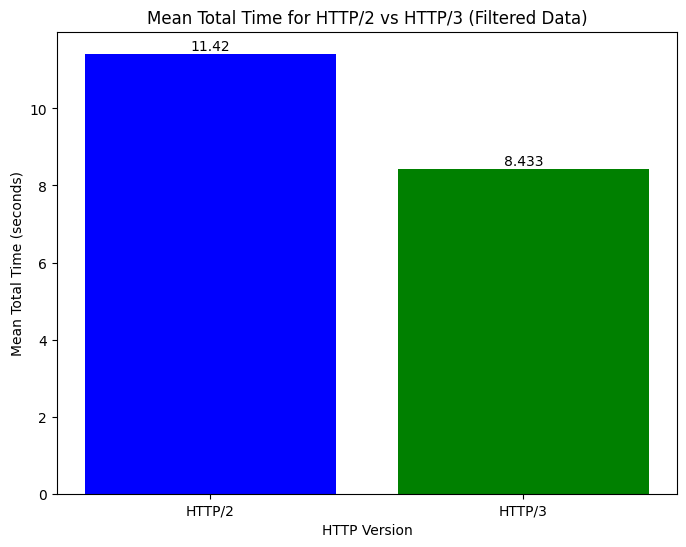

In [2]:
import matplotlib.pyplot as plt

# Preparing data for the diagram
mean_total_time = {
    'HTTP/2': new_mean_values_h2['time_total'],
    'HTTP/3': new_mean_values_h3['time_total']
}

# Plotting the diagram with exact mean values on top of the columns
plt.figure(figsize=(8, 6))
bars = plt.bar(mean_total_time.keys(), mean_total_time.values(), color=['blue', 'green'])

# Adding the exact mean values on top of the columns
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.xlabel('HTTP Version')
plt.ylabel('Mean Total Time (seconds)')
plt.title('Mean Total Time for HTTP/2 vs HTTP/3 (Filtered Data)')
plt.show()

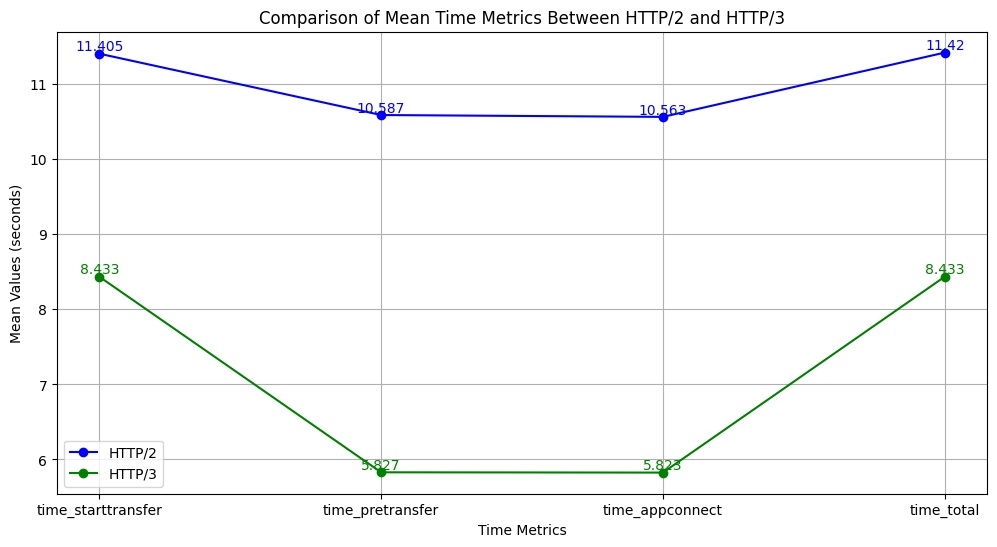

In [3]:
# Extracting mean values for different time metrics for both HTTP/2 and HTTP/3
time_metrics = ['time_starttransfer', 'time_pretransfer', 'time_appconnect', 'time_total']
mean_values_h2_filtered = filtered_data_h2[time_metrics].mean()
mean_values_h3_filtered = filtered_data_h3[time_metrics].mean()

# Plotting the multi-line chart with exact mean values above the dots
plt.figure(figsize=(12, 6))

# Plot for HTTP/2
plt.plot(time_metrics, mean_values_h2_filtered, marker='o', color='blue', label='HTTP/2')
for i, value in enumerate(mean_values_h2_filtered):
    plt.text(time_metrics[i], value, round(value, 3), ha='center', va='bottom', color='blue')

# Plot for HTTP/3
plt.plot(time_metrics, mean_values_h3_filtered, marker='o', color='green', label='HTTP/3')
for i, value in enumerate(mean_values_h3_filtered):
    plt.text(time_metrics[i], value, round(value, 3), ha='center', va='bottom', color='green')

# Adding chart details
plt.xlabel('Time Metrics')
plt.ylabel('Mean Values (seconds)')
plt.title('Comparison of Mean Time Metrics Between HTTP/2 and HTTP/3')
plt.legend()
plt.grid(True)
plt.show()


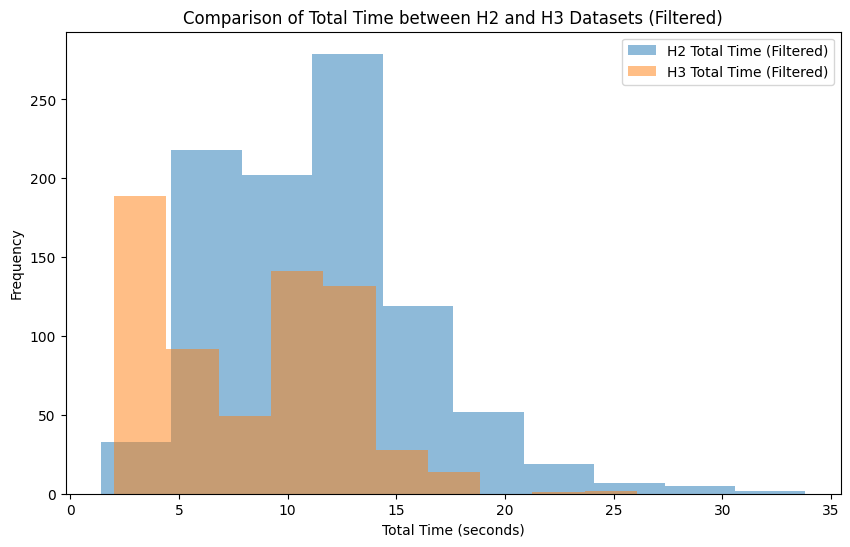

In [4]:
# Step 4: Diagram comparing total times
# Extracting 'time_total' from both datasets
total_time_h2tc = filtered_data_h2['time_total']
total_time_h3tc = filtered_data_h3['time_total']

# Plotting the comparison of total times
plt.figure(figsize=(10, 6))
plt.hist(total_time_h2tc, alpha=0.5, label='H2 Total Time (Filtered)')
plt.hist(total_time_h3tc, alpha=0.5, label='H3 Total Time (Filtered)')
plt.xlabel('Total Time (seconds)')
plt.ylabel('Frequency')
plt.title('Comparison of Total Time between H2 and H3 Datasets (Filtered)')
plt.legend()
plt.show()